## Importing libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data  = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Renaming the columns of the dataframe.

In [3]:
data = data.rename(columns ={'CustomerID':'customer_id','Gender':'gender','Age':'age',
                    'Annual Income (k$)':'annual_income_in_$','Spending Score (1-100)':'spending_score'})

In [4]:
data.head()

,customer_id,gender,age,annual_income_in_$,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking for missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         200 non-null    int64 
 1   gender              200 non-null    object
 2   age                 200 non-null    int64 
 3   annual_income_in_$  200 non-null    int64 
 4   spending_score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Checking for outliers.

In [6]:
data.describe()

,customer_id,age,annual_income_in_$,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Droping the unwanted columns.

In [7]:
data = data.drop(columns = 'customer_id')

#### Ploting the histogram according to the feature gender.

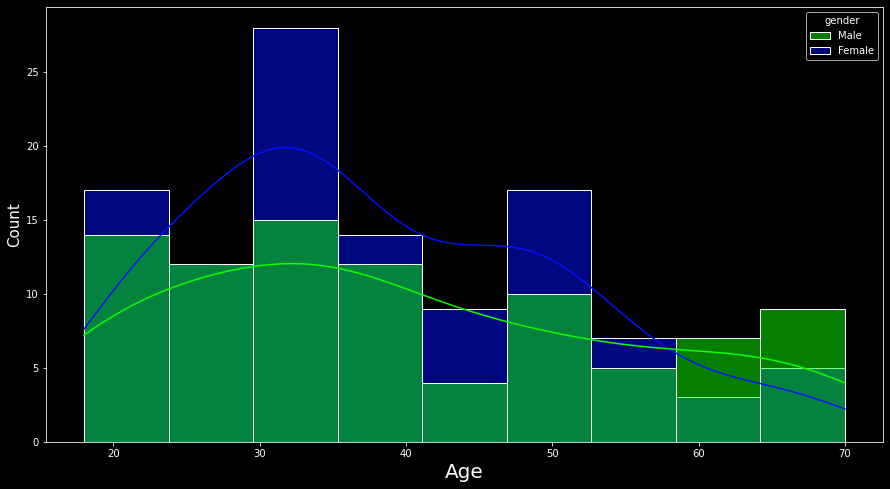

In [8]:
plt.figure(figsize=(15,8))
sns.histplot(data = data,x = data['age'],hue='gender',palette='hsv',kde=True)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

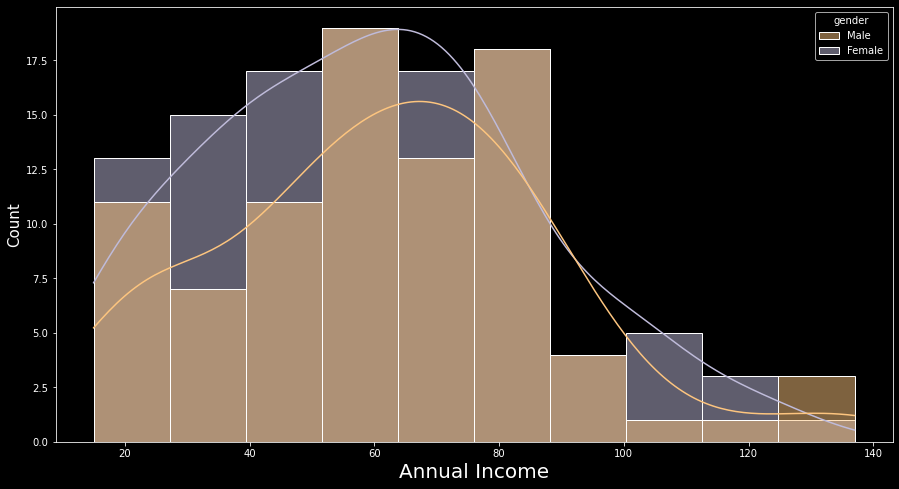

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(data = data,x = data['annual_income_in_$'],hue='gender',palette='PuOr',kde=True)
plt.xlabel("Annual Income",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

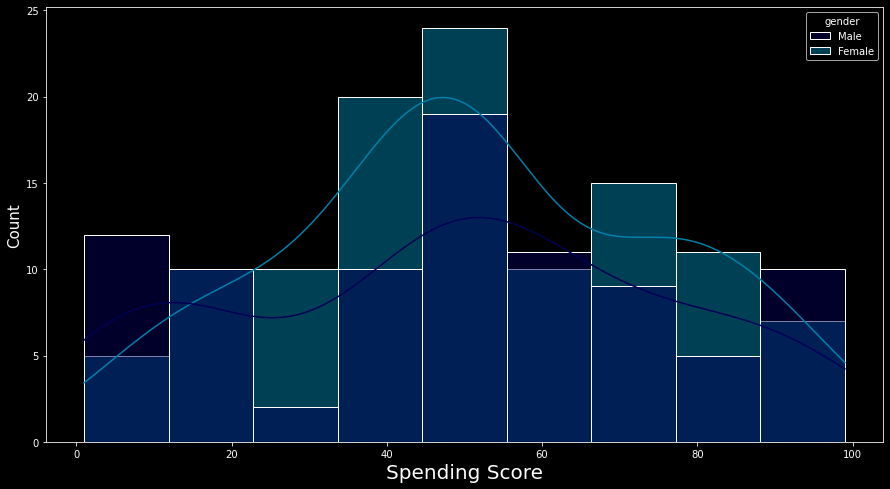

In [10]:
plt.figure(figsize=(15,8))
sns.histplot(data = data,x = data['spending_score'],hue='gender',palette='ocean',kde=True)
plt.xlabel("Spending Score",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Visualizing the countplot for cheching count of data for corresponding values in age, annual income and spending score.

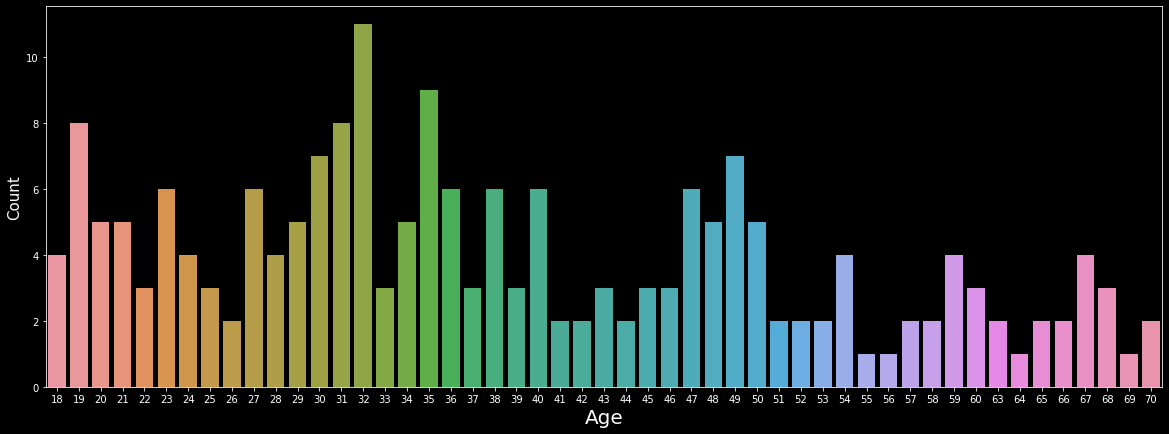

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(data['age'])
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

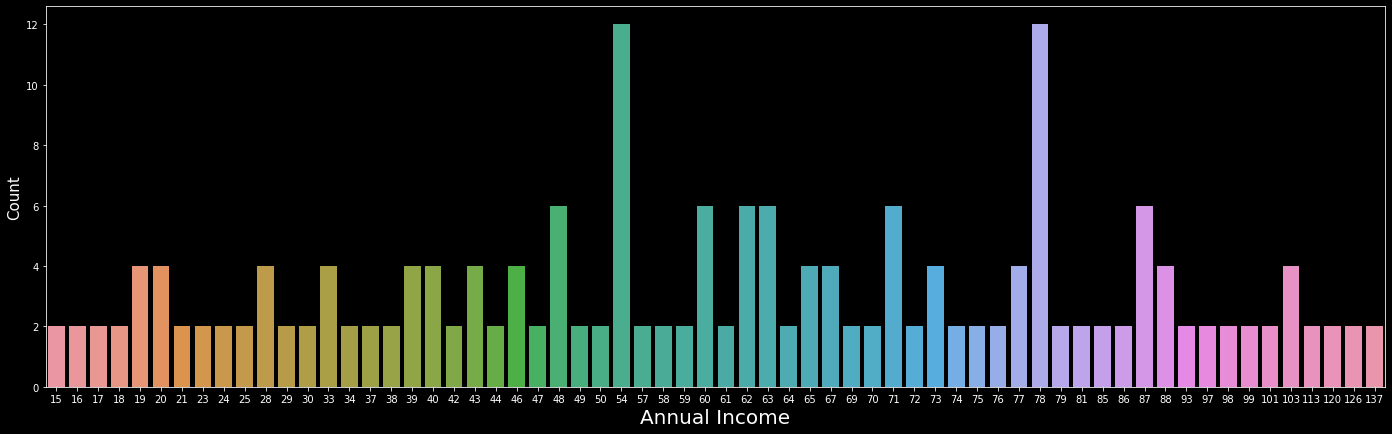

In [12]:
plt.figure(figsize=(24,7))
sns.countplot(data['annual_income_in_$'])
plt.xlabel("Annual Income",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

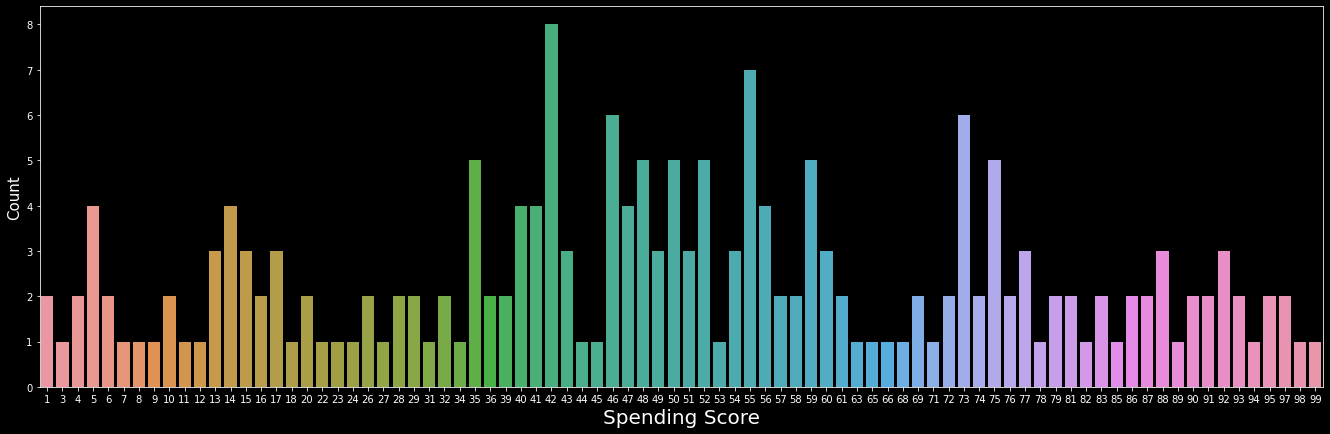

In [13]:
plt.figure(figsize=(23,7))
sns.countplot(data['spending_score'])
plt.xlabel("Spending Score",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Comparing the feature gender.

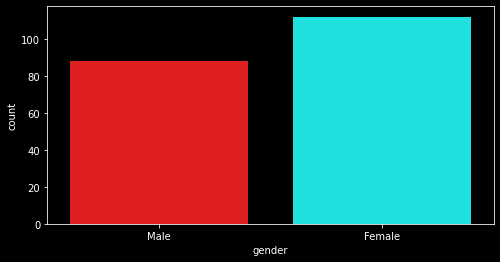

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data['gender'],palette=['red','cyan'])
plt.show()

#### Getting dummies of categorical features.

In [15]:
data = pd.get_dummies(data = data, columns=['gender'],drop_first=True)

In [16]:
data.head()

,age,annual_income_in_$,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


#### Ploting correlation heatmap.

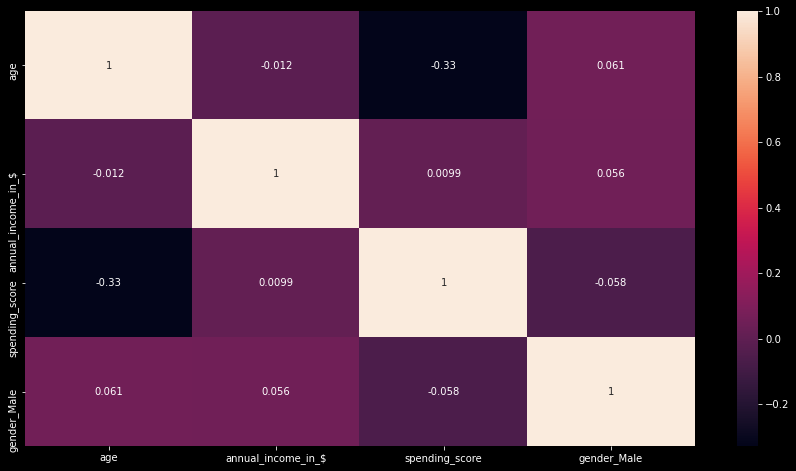

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
X = data

In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
pred = model.predict(X)

In [20]:
model.inertia_

212889.44245524294

In [21]:
model.score(X)

-212889.44245524288

In [22]:
sse = []
for cluster in range(1,10):
    km = KMeans(n_clusters=cluster)
    km.fit(X)
    sse.append(km.inertia_)

In [23]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':sse})

#### Ploting plot for taking sutaible number of clusters using elbow method.

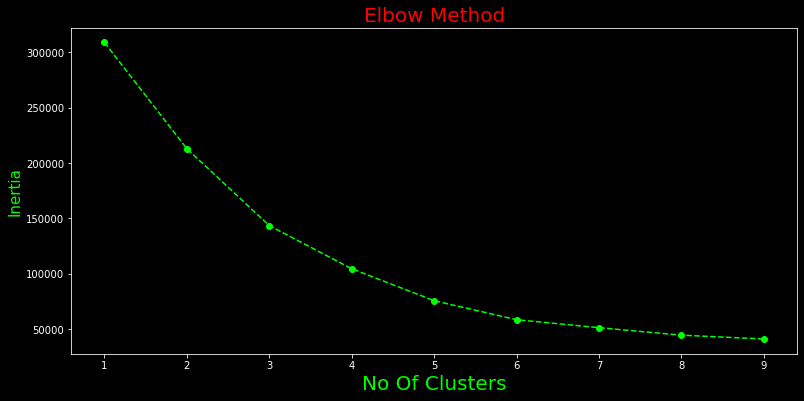

In [24]:
plt.figure(figsize = (13,6))
plt.plot(frame['Cluster'],frame['SSE'],color = 'lime' ,linestyle = '--',marker='o')
plt.title("Elbow Method",fontsize=20,color='r')
plt.xlabel('No Of Clusters',fontsize=20,color='lime')
plt.ylabel('Inertia',fontsize=15,color='lime')
plt.show()

In [25]:
km = KMeans(n_clusters=5)
km.fit(X)
pred = km.predict(X)

In [26]:
print(pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [27]:
X['cluster'] = pred

In [28]:
def seg(str_x,str_y,clusters):
    x = []
    y = []
    for i in range(clusters):
        x.append(X[str_x][X['cluster']==i])
        y.append(X[str_y][X['cluster']==i])
    
    return x,y

In [29]:
def plot(str_x,str_y,clusters):
    plt.figure(figsize = (7,5),dpi = 120)
    
    x,y = seg(str_x,str_y,clusters)
    for i in range(clusters):
        plt.scatter(x[i], y[i], label = 'cluster {}'.format(i+1))
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str(str_x+" VS "+str_y))
    plt.legend()
    plt.show()

### Plotting clusters for annual income and age.

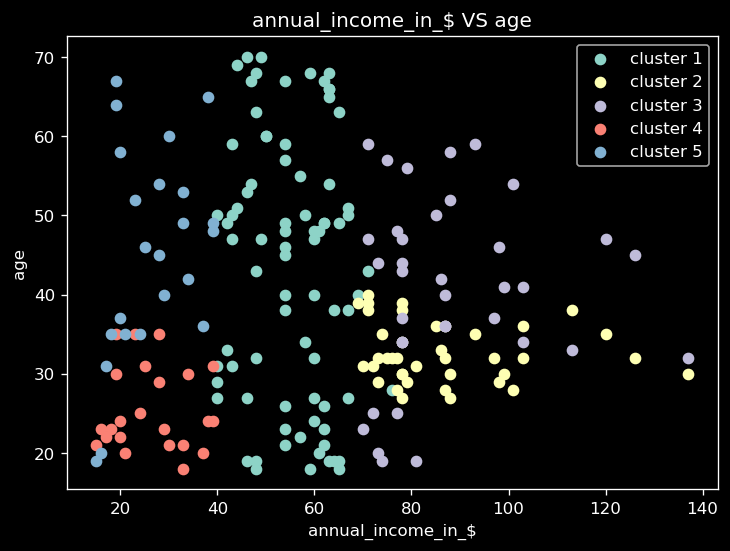

In [30]:
plot('annual_income_in_$','age',5)

### Plotting clusters for spending score and age. 

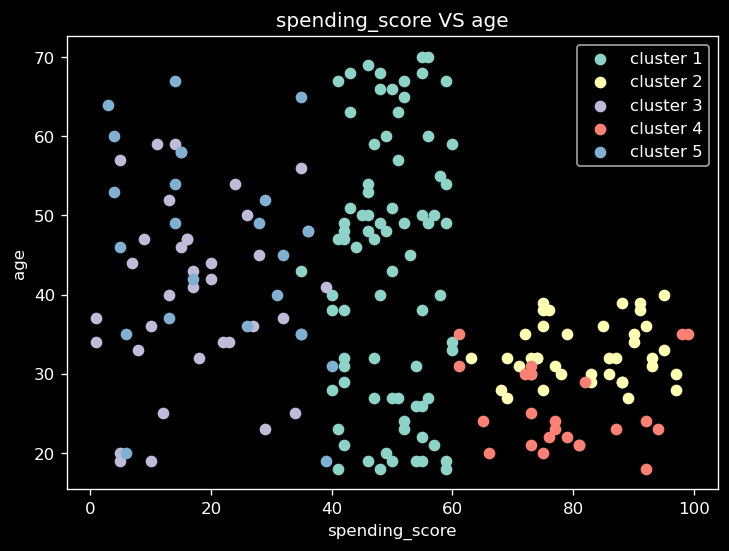

In [31]:
plot('spending_score','age',5)

### Plotting clusters for annual income and spending score.

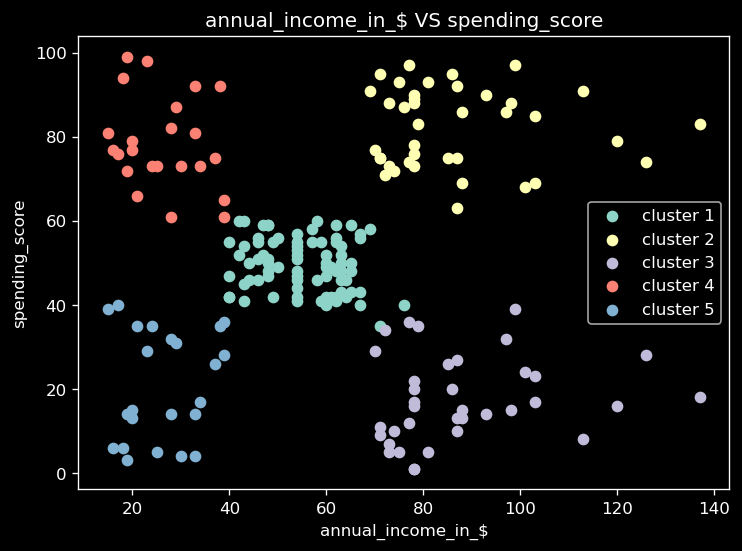

In [32]:
plot('annual_income_in_$','spending_score',5)